<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch5_1_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch5.1 - 분류"
date: 2020-04-18T11:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "분류"
  - "이항분류"
  - "Binary Classification"
  - "Classification"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch5.1 - 분류
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)


## I. 분류의 개요

분류는 크게 2가지로 구분됩니다. 

- 분류 문제에 명확한 정답이 있는 경우 Vs. 분류 문제에 명확한 정답이 없는 경우. 

보통 이러한 경우 지도학습 Vs. 비지도학습이라고 얘기를 하는데, 난이도로 따지면 비지도학습이 조금 더 어렵습니다. 예를 들면, 개인정보가 가려진 신용카드 사용 정보로 비슷한 유형의 구매자 군집을 분류하는 문제도 분류 문제의 일종입니다. 이 부분에 대한 설명이 오토인코더(AutoEncoder)라 불리우는 9장에서 조금더 다루도록합니다. 
이번장에서는 지도학습(Supervised Learning)에 해당하는 분류 문제만 다룹니다. 

그 외에 조금 더 구체적인 이론적 개념이 필요하신 분들은 NVIDIA의 글을 한번 읽어보시기를 바랍니다. 
- [딥러닝 지도학습, 자율학습, 지도/자율 학습, 강화학습의 차이점은 무엇일까?](https://blogs.nvidia.co.kr/2018/09/03/supervised-unsupervised-learning/)

## II. 이항분류

와인 데이터세트로 이항분류를 진행합니다. 와인은 크게 레드 와인과 화이트 와인의 두 종류로 나눌 수 있습니다. 색깔 없이 단순히, 당도, 산도, 알코올 도수 등으로 분류하는 것은 쉽지 않습니다. 이번에는 데이터 정제 과정을 거쳐야 하기 때문에 주의깊게 살펴보시기를 바랍니다.


In [0]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [90]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

판다스 데이터프레임에 관한 설명은 강사가 작성해 놓은 자료를 참조하셔서 공부하시기를 바랍니다. 
- [Pandas Dataframe](https://chloevan.github.io/python/pandas/pandas_dataframe/)

데이터프레임은 여러 개의 행으로 구성되어 있으며, `head()`는 이 가운데 일부를 출력해서 보여줍니다. 각 데이터에 대한 속성은 영어로도 정리가 되어 있지만, 한글 독자분들은 교재 (108 p.)를 참고하시기를 바랍니다. 

원서의 정리는 다음 자료에서 확인합니다. 
- [Wine Quality Data Set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

### (1) 데이터 합치기
와인 분류문제에서는 12개 속성으로 와인의 종류(레드/화이트)를 분류해야 합니다. 현재는 `red`와 `white`의 두 데이터프레임으로 데이터가 분리되어 있기 때문에 텐서플로에서 이 데이터를 사용하기 위해 두 데이터프레임을 하나로 합쳐야 합니다. 

In [91]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

각 코드에 대한 설명은 다음과 같습니다. 
- 먼저 데이터프레임에 새로운 속성을 추가하는 방법은 단순히 `red['type'] = 0` 처럼 데이터프레임이 파이썬의 사전(`dictionary`) 타입인 것처럼 속성명과 값을 지정합니다. 레드 와인은 0, 화이트 와인은 1로 지정했습니다. 이 부분이 이항분류의 종속변수가 될 것입니다. 
- `pd.concat()` 데이터 프레임을 단순히 위아래로 연결하는 새로운 데이터프레임을 만들어 냅니다. 
- 데이터가 잘 입력되었는지 가설을 확인하기 위해 간단한 그래프를 그려봅니다. 



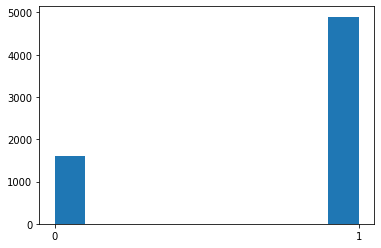

1    4898
0    1599
Name: type, dtype: int64


In [92]:
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

 위 그래프를 토대로 확인해보면 레드 와인보다 화이트 와인이 더 많다는 것을 알 수 있습니다. 정확한 수치로 표현하기 위해 `value_counts()`함수를 사용했습니다. 

 ### (2) 데이터 정규화
데이터 정규화는 수치형 값에 적용하는 것이지, 문자열에 적용하는 건 아닙니다. 문제는 외부에서 불러오는 데이터의 경우 어떤 값으로 구성되어 있는지 알기 어려운데, 이 때 데이터의 파악을 도와주는 것이 판다스의 `info()` 입니다. 


In [82]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


다행히 모든 데이터가 `float64` & `int64`인 것을 확인할 수 있습니다. 데이터 정규화는 다음의 한줄 코드로 실현이 가능합니다.

In [93]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

- `pandas`에서는 `max()`, `min()`함수를 이용해 각 속성의 최대값과 최소값을 얻을 수 있고, 이 값들을 이용해 모든 속성과 모든 행에 대한 계산이 가능합니다. 
- `describe()`함수에서 볼 수 있는 속성들이 0~1사이로 값이 모아진 것을 확인할 수 있습니다.

### (3) 데이터 변환 (DataFrame에서 Array)
- 이렇게 정규화된 데이터를 `NumPy Array`로 변환합니다.

In [94]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
3006       0.198347          0.053333     0.192771  ...  0.434783  0.500000   1.0
3757       0.223140          0.120000     0.204819  ...  0.391304  0.333333   1.0
3052       0.148760          0.080000     0.397590  ...  0.347826  0.666667   1.0
1270       0.099174          0.200000     0.006024  ...  0.869565  0.500000   0.0
1087       0.338843          0.073333     0.253012  ...  0.463768  0.500000   0.0

[5 rows x 13 columns]
[[0.19834711 0.05333333 0.19277108 0.00766871 0.0448505  0.25347222
  0.41013825 0.07422402 0.3875969  0.10674157 0.43478261 0.5
  1.        ]
 [0.2231405  0.12       0.20481928 0.01226994 0.05149502 0.08333333
  0.41013825 0.09735878 0.44186047 0.13483146 0.39130435 0.33333333
  1.        ]
 [0.14876033 0.08       0.39759036 0.14723926 0.05647841 0.26736111
  0.38940092 0.14247156 0.20155039 0.11797753 0.34782609 0.66666667
  1.        ]
 [0.09917355 0.2        0.0060241  0.01533

판다스의 `sample()` 함수는 전체 데이터프레임에서 `frac`인수로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이터프레임을 만듭니다. 
`frac=1`로 지정됐기 때문에 `100%`, 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과를 가집니다. 

*Tip: 입문자들이 처음 딥러닝 소스코드 작성하는 것을 어려워 하는 부분이 엑셀데이터와 같은 데이터프레임을 딥러닝의 Input 객체로 변환하는가인데, 위 소스코드는 굉장히 유용하며, 만약 반복적인 작업이 이루어지면 사용자 정의 함수를 사용하여 작성하여 사용하는 것도 도움이 된다. 

### (4) 훈련 데이터와 테스트 데이터 분리
훈련 데이터와 테스트 데이터로 나누어 진행합니다. 검증데이터는 훈련데이터서 일부를 떼서 자동으로 만들 예정이기 때문에, 여기에서는 훈련 데이터와 테스트 데이터로만 나누어 진행합니다.

In [95]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.19834711 0.05333333 0.19277108 0.00766871 0.0448505  0.25347222
 0.41013825 0.07422402 0.3875969  0.10674157 0.43478261 0.5       ]
1.0
[0.84297521 0.22       0.37951807 0.04907975 0.13289037 0.01736111
 0.09447005 0.27549643 0.2248062  0.33146067 0.4057971  0.5       ]
0.0
[0. 1.]
[1. 0.]


위 소스코드에 대한 설명은 아래와 같습니다. 

- 먼저 80%에 해당하는 데이터를 훈련 데이터와 검증 데이터로 만들기 위해 wine_np의 수의 80%에 해당하는 인덱스를 `int`값으로 저장합니다. 
- 그 다음 이 인덱스를 이용해 `wine_np`를 분리합니다. NumPy Array에서는 2차원 이상의 인덱스에 접근할 때 쉼표(,)를 사용하기 때문에 쉼표를 이용해 `X`와 `Y`도 구분합니다. 12개의 기존 속성은 `X`가 되고 새롭게 추가한 `type`은 `Y`가 됩니다. 
- `to_categorical` 분류 문제에서 자주 쓰이는 함수로 정답 행렬을 `원-핫 인코딩(One-Hot Encoding)` 방식으로 바꿉니다. 이 함수의 두번째 인수인 `num_classes`는 정답 클래스의 개수입니다. 

## III. 딥러닝 학습

시퀀셜 모델을 통해서 모형을 학습니다. 

In [96]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_33 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_34 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


회귀모형과 다르게 분류 모델이기 때문에 소프트맥스(`softmax`)를 사용했습니다. 소프트맥스의 역할은 큰 값을 강조하고 작은 값은 약화하는 효과를 갖습니다. (자세한 내용은 교재 117페이지 참고)

우선, [2,1,0]이라는 값이 있습니다. 
- max로 변환 시, [2,0,0]이 됩니다. 
- softmax로 변환하면 [0.67, 0.24, 0.09]의 확률값이 됩니다. 

$e$를 밑으로 하는 지수함수를 취하기 때문에 위의 효과가 발생하며, 0이나 음수에도 적용 가능합니다. `softmax`가 중요한 이유는 분류 문제나 언어 `RNN`에서의 다음 토큰 예측, 강화학습에서 에이전트의 행동 확률을 구하는 결과값으로 확률이 필요한 다양한 분야에서 쓰입니다. 

여기에서는 예측값이 레드 와인일 확률과 화이트 와인일 확률을 구하는데 사용되며, [0.97, 0.03]처럼 합이 `1.0`인 확률값이 될 것입니다. 



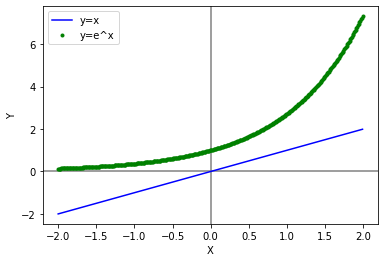

In [87]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

마지막 레이어에서 한 가지 더 주목할 점은 뉴런의 개수가 2로 설정되어 있다는 점입니다. 이는 종속변수의 클래스 숫자와 동일합니다. 

손실함수 `loss`에는 `sparse_categorical_crossentropy`라는 값이 들어가 있습니다. 이에 관한 구체적인 설명은 118~119 페이지에 있으니 참고바랍니다. 엔트로피와 정보이론에 관한 설명은 다음 자료를 참고하십시요. 
- [Cross Entropy 란 무엇인가 (information theory)](http://blog.naver.com/gyrbsdl18/221013188633)

이제 분류 네트워크를 학습시켜 봅니다. 

In [97]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8673 - val_loss: 0.1034 - val_accuracy: 0.9762
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9800 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9833 - val_loss: 0.0786 - val_accuracy: 0.9754
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9931
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9885 - val_loss: 0.0334 - val_accuracy: 0.9877
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9908 - val_loss: 0.0365 - val_accuracy: 0.9931
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9892 - val_loss: 0.0277 - val_accuracy: 0.9946
Epoch 

학습 과정에서의 training 데이터의 정확도와 검증 데이터의 정확도가 각각 accuracy와 val_accuracy라는 이름으로 표시됩니다. 

분류 모델의 학습 결과를 시각화해보면 정확도가 100%에 가까운 매우 좋은 결과를 유지하고 있음을 확인할 수 있습니다. 


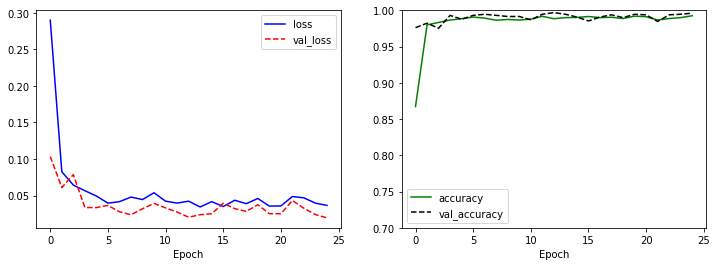

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## IV. 딥러닝 모형 평가
`model.evaluate()` 함수를 통해서 모델의 성능을 평가할 수 있습니다. 

In [99]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9915


[0.044681474566459656, 0.9915384650230408]


## V. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch5_1_binary_classification.ipynb) 

## VI. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.